In [1]:
from sklearn.metrics import pairwise_distances_argmin

from csv import reader
from math import sqrt
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
 # Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
        #print('[%s] => %d' % (value, i))
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

In [3]:

def find_clusters(X, num_clusters,  num_iterations=10):
    # 1. Randomly choose clusters
    #rseed=2
    #rng = np.random.RandomState(rseed)
    #i = rng.permutation(X.shape[0])[:num_clusters]
    #centers = X[i]
    
    initial_center_indexes = [index for index in range(num_clusters)]
    centers = X[np.array(initial_center_indexes)]
    print ("Initial centers", centers, initial_center_indexes)
        
    iterations = 0
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(num_clusters)])
        
        print ('Iteration ', iterations, ' new centers', new_centers)
        print ('Assignment to centers : ',labels)
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        iterations = iterations + 1
        if iterations >= num_iterations:
            break
            
    
    return centers, labels

[[2. 1.]
 [3. 1.]
 [5. 2.]
 [6. 0.]]
Initial centers [[2. 1.]
 [3. 1.]] [0, 1]
Iteration  0  new centers [[2.         1.        ]
 [4.66666667 1.        ]]
Assignment to centers :  [0 1 1 1]
Iteration  1  new centers [[2.5 1. ]
 [5.5 1. ]]
Assignment to centers :  [0 0 1 1]
Iteration  2  new centers [[2.5 1. ]
 [5.5 1. ]]
Assignment to centers :  [0 0 1 1]
Centers [[2.5 1. ]
 [5.5 1. ]]


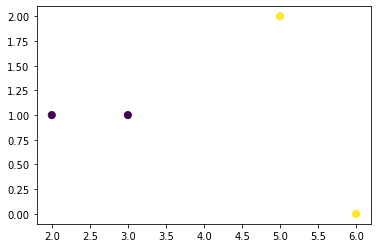

In [5]:
def prepare_dataset(filename):
    dataset = load_csv(filename)
    #print (dataset)
    for i in range(len(dataset[0])-1):
        str_column_to_float(dataset, i)

    str_column_to_int(dataset, len(dataset[0])-1)
    return dataset

def run_kmeans(dataset, num_clusters=3, num_iterations=10):        
    # Delete data last position (no use of class field)
    X = np.array(dataset)
    X = np.delete(X, -1, axis=1)
    print (X)
    # define model parameter
    centers, labels = find_clusters(X, num_clusters=num_clusters)
    print ("Centers", centers)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');


dataset = prepare_dataset('example_kmeans.csv')   
run_kmeans(dataset, num_clusters=2, num_iterations=10)

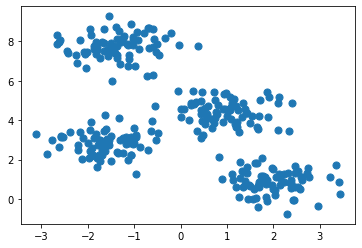

In [15]:
# How to create synthetic data

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [13]:
print (X)

[[ 8.36856841e-01  2.13635938e+00]
 [-1.41365810e+00  7.40962324e+00]
 [ 1.15521298e+00  5.09961887e+00]
 [-1.01861632e+00  7.81491465e+00]
 [ 1.27135141e+00  1.89254207e+00]
 [ 3.43761754e+00  2.61654166e-01]
 [-1.80822253e+00  1.59701749e+00]
 [ 1.41372442e+00  4.38117707e+00]
 [-2.04932168e-01  8.43209665e+00]
 [-7.11099611e-01  8.66043846e+00]
 [-1.71237268e+00  2.77780226e+00]
 [-2.67000792e+00  8.35389140e+00]
 [ 1.24258802e+00  4.50399192e+00]
 [-2.22783649e+00  6.89479938e+00]
 [ 1.45513831e+00 -2.91989981e-02]
 [ 4.53791789e-01  3.95647753e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 2.56936589e+00  5.07048304e-01]
 [-1.06690610e+00  3.13165795e+00]
 [-1.07859101e+00  2.20451529e+00]
 [ 2.71506328e+00  1.29082190e+00]
 [ 1.77710994e+00  1.18655254e+00]
 [ 7.34363910e-01  5.03725437e+00]
 [-1.99648151e+00  2.85164868e+00]
 [-1.91828017e+00  2.60516867e+00]
 [-5.55523811e-01  4.69595848e+00]
 [ 1.69747910e+00  8.66123282e-01]
 [ 5.94762432e-01  4.70964730e+00]
 [-2.88024255e+00  2